In [2]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My modules
from declination_smoothed import dec_smoothed_pos_max
from my_progs.catalog.read_gaia import read_gaiadr2_qso
from my_progs.catalog import read_icrfn
from my_progs.catalog.pos_diff import pos_diff_calc

Load the data from catalogs.

In [3]:
# Read ICRF3 S/X catalog
icrf3_sx = read_icrfn.read_icrf3(wv="sx")

icrf3_sx

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000020.3-322101,2357-326,--,0.08499990025,-32.350342705972224,0.1018819152558419,0.26239999999999997,-0.0602,56559.8,0.26248432591237514,52306.7,57776.0,4,237
J000027.0+030715,2357+028,--,0.11259380737499998,3.1210128779444446,0.8883304445189708,0.34209999999999996,-0.0119,57974.7,0.8883413965937612,57974.7,57974.7,1,28
J000053.0+405401,2358+406,--,0.22117109666666665,40.900502681055556,0.170519246717052,0.26699999999999996,-0.1654,56460.2,0.26942932367783917,50242.8,57809.9,3,152
J000105.3-155107,2358-161,--,0.27220306162499996,-15.851965341722222,0.10129550931840807,0.22609999999999997,-0.2106,56338.4,0.22733864770189094,50632.3,58137.6,4,316
J000107.0+605122,2358+605,--,0.2795825644583333,60.85633280208334,0.24676349421345134,0.19479999999999997,0.1619,57160.2,0.2515606941056636,52306.7,57836.8,3,172
J000108.6+191433,2358+189,--,0.2859231923333333,19.242722698222224,0.03682110462165689,0.0472,-0.0314,55771.9,0.04723602208620724,50085.5,58205.8,168,3584
J000211.9-215309,2359-221,--,0.5499226089166666,-21.886073762777777,0.1855389805384662,0.46729999999999994,-0.3427,57436.5,0.47228145572921587,54818.7,57901.9,3,103
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251


In [4]:
# Read ICRF3 K catalog
icrf3_k = read_icrfn.read_icrf3(wv="k")

icrf3_k

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000435.6-473619,0002-478,D,1.1485647359583333,-47.60544541102778,0.4516681517736428,1.0827,0.6589,57961.2,1.1267942729306641,57599.3,58067.8,7,13
J000504.3+542824,0002+541,--,1.2681805876666665,54.473590121250005,0.07321584713652726,0.0905,0.0477,57561.2,0.09069246230326641,53898.6,58181.5,9,732
J000557.1+382015,0003+380,--,1.4882307991666666,38.3375413845,0.05294498242586314,0.07369999999999999,-0.1988,57909.1,0.07512354105978385,57372.1,58195.8,10,724
J000613.8-062335,0003-066,--,1.5578870084583334,-6.393148817805556,0.047850566755598754,0.10609999999999999,-0.4903,57819.0,0.10909553579758349,56782.4,58181.5,9,658
J000903.9+062821,0006+061,--,2.2663827199999997,6.472566606222222,0.11506188429537391,0.22569999999999998,-0.3528,57837.4,0.23032386525156387,52782.5,58195.8,7,316
J001031.0+105829,0007+106,D,2.6291912593749993,10.974862327916666,0.04785840167457787,0.09199999999999998,-0.333,55132.2,0.09377908666520379,52782.5,58244.2,12,1043
J001101.2-261233,0008-264,--,2.7551947386666664,-26.209271354527775,0.07845899574871043,0.2045,-0.3768,57655.1,0.2069232370376186,57416.9,58070.2,9,298
J001135.2+082355,0009+081,--,2.8969566952083325,8.398773987166667,0.0753827899464934,0.1347,-0.2236,54738.5,0.13617954520385336,52782.5,58082.4,10,579


In [5]:
# Read ICRF3 X/Ka catalog
icrf3_xka = read_icrfn.read_icrf3(wv="xka")

icrf3_xka

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000435.6-473619,0002-478,D,1.1485644423333332,-47.60544576569445,0.13552067157926384,0.15839999999999999,-0.4333,57086.5,0.17781648296586014,56297.6,58027.3,23,30
J000504.3+542824,0002+541,--,1.268180768958333,54.47359004538889,0.09003805980033948,0.1306,0.1878,57364.8,0.13255795927164774,55304.5,58146.7,27,54
J000557.1+382015,0003+380,--,1.488230883375,38.33754131888889,0.05988665795370894,0.08139999999999999,-0.3088,56844.3,0.08511922253959626,53561.7,58146.9,88,126
J000613.8-062335,0003-066,--,1.5578869827083333,-6.393148639388889,0.09346512575149064,0.12929999999999997,-0.5731,56545.8,0.14394735046495033,53561.6,58146.8,92,137
J000903.9+062821,0006+061,--,2.266382655708333,6.47256664575,0.09225816887728226,0.119,-0.6048,56785.3,0.13620602079885977,53651.5,58146.8,77,110
J001031.0+105829,0007+106,D,2.629191267708333,10.974862303833333,0.05522123270593726,0.08829999999999999,-0.4731,56132.3,0.09345139236115027,53694.3,58146.9,113,179
J001101.2-261233,0008-264,--,2.755194709333333,-26.209271528888888,0.12192770161551496,0.1281,-0.7062,56815.1,0.16338616394166613,53561.7,58111.2,66,114
J001135.2+082355,0009+081,--,2.8969566850833326,8.398773887555555,0.07597635524116485,0.10949999999999999,-0.5487,56940.2,0.12001796488424711,53694.3,58146.9,67,95


In [6]:
# Read ICRF1 catalog
icrf1 = read_icrfn.read_icrf1()

icrf1

icrf_name,iers_name,type,ra,dec,si_s,si_x,ra_err,dec_err,pos_err,ra_dec_corr,mean_obs,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,,,mas,mas,mas,,,,,,
str16,str8,str1,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000435.6-473619,0002-478,C,1.1485649833333333,-47.60544543333334,--,--,0.7989651584169764,0.97,0.970368462441557,0.019,2449436.0,2449331.0,2449525.2,3,7
J000557.1+382015,0003+380,D,1.488230870833333,38.33754126944444,--,--,0.482387618423914,0.51,0.5132372638901311,-0.041,2449087.5,2448721.4,2449555.3,2,41
J000613.8-062335,0003-066,C,1.5578870291666664,-6.3931485694444445,3,1,0.2832276538311365,0.33999999999999997,0.39501575086843943,-0.575,2448728.6,2447177.0,2449566.4,41,114
J001031.0+105829,0007+106,D,2.6291911999999997,10.974862255555555,--,--,0.47122118583433,0.6799999999999999,0.7435696480712186,0.54,2447939.4,2447289.2,2449690.5,10,74
J001033.9+172418,0007+171,D,2.6416275791666664,17.40521148611111,--,--,0.30057713422969745,0.35,0.38944467653748166,-0.402,2448731.3,2447932.1,2449663.3,19,57
J001052.5-415310,0008-421,C,2.7188318375,-41.88632994444444,--,--,7.280925025767699,7.279999999999999,9.058253083842773,-0.548,2448552.3,2448162.9,2449331.0,2,6
J001101.2-261233,0008-264,C,2.7551947999999995,-26.209271349999998,--,--,0.47102313058519535,0.39999999999999997,0.5264251833925705,-0.427,2448892.9,2447686.6,2449791.2,7,38
J001331.1+405137,0010+405,D,3.379709220833333,40.86031779722222,2,1,0.29495963311504103,0.33999999999999997,0.34073318132559427,-0.038,2449550.1,2448435.2,2449821.0,7,219


In [7]:
# Read ICRF2 catalog
icrf2 = read_icrfn.read_icrf2()

icrf2

icrf_name,ivs_name,iers_name,ra,dec,type,ra_err,dec_err,ra_dec_corr,pos_err,mean_obs,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,,mas,mas,,mas,,,,,
str16,str8,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000020.3-322101,2357-326,2357-326,0.08499978154166665,-32.35034264325,V,0.4228606361249806,0.9246,-0.004,0.9246019563265486,52306.7,52306.7,52306.7,1,40
J000053.0+405401,2358+406,2358+406,0.2211731990833333,40.90049807775,V,1.7733322629796062,2.0936,-0.164,2.1522926501977038,50242.8,50242.8,50242.8,1,22
J000105.3-155107,2358-161,2358-161,0.27220320083333327,-15.851965569361111,V,0.4592928857503561,0.8910999999999999,-0.749,0.9620600872877471,50632.3,50632.3,50632.3,1,58
J000107.0+605122,2358+605,2358+605,0.27958165691666664,60.85633416630556,V,2.3293508596752726,3.5917999999999997,-0.102,3.6051651029612515,52306.7,52306.7,52306.7,1,11
J000108.6+191433,2358+189,2358+189,0.28592319541666666,19.242722705277778,N,0.06939362024552428,0.0984,0.08,0.09870723270272877,53306.0,50085.5,54907.7,21,716
J000211.9-215309,2359-221,2359-221,0.5499276015,-21.88606554838889,N,16.062415294281355,38.6714,0.971,41.72301021726925,54818.7,54818.7,54818.7,1,3
J000315.9-194150,0000-199,0000-199,0.8164555134166667,-19.697332749361113,V,4.6366314167931675,13.643499999999998,-0.943,14.33480339351269,54088.1,54088.1,54088.1,1,11
J000318.6-192722,0000-197,0000-197,0.8278126013333333,-19.456209681833332,V,0.4859687733303084,0.9445999999999999,-0.224,0.9528939533621429,50650.0,50632.3,50688.3,2,76


In [8]:
# Read Gaia DR2 IERS quasar data
gaiadr2 = read_gaiadr2_qso()

# Positional difference between ICRF3 SX and Gaia DR2.
- Crossmatch between ICRF3 SX and Gaia DR2.
- Calculate the positional difference.

In [11]:
# Crossmatch.
gdr2_k_com = join(icrf3_k, gaiadr2, keys="iers_name", table_names=["sx", "gdr2"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    gdr2_k_com["ra_k"], gdr2_k_com["ra_err"], gdr2_k_com["dec_k"], gdr2_k_com["dec_err"], gdr2_k_com["ra_dec_corr_k"],
        gdr2_k_com["ra_gdr2"], gdr2_k_com["ra_error"], gdr2_k_com["dec_gdr2"], gdr2_k_com["dec_error"], gdr2_k_com["ra_dec_corr_gdr2"])

gdr2_k_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

gdr2_k_com["dra"].unit = u.mas
gdr2_k_com["ddec"].unit = u.mas
gdr2_k_com["dra_err"].unit = u.mas
gdr2_k_com["ddec_err"].unit = u.mas
gdr2_k_com["dra_ddec_cov"].unit = u.mas * u.mas
gdr2_k_com

icrf_name,iers_name,type,ra_sx,dec_sx,ra_err,dec_err,ra_dec_corr_sx,mean_obs,pos_err_sx,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gdr2,ra_error,dec_gdr2,dec_error,pos_err_gdr2,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr_gdr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dra,dra_err,ddec,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep_cov,nor_sep
,,,deg,deg,mas,mas,,,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,mas,mas,mas,mas,mas2,deg,deg,deg,deg,deg
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000318.6-192722,0000-197,--,0.8278126181249998,-19.456209925444444,0.2043727812594762,0.4265,-0.043,55829.0,0.4266174244028753,50632.3,58137.6,5,296,2365855384650325376,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.24241216451703895,-0.45544305828221626,0.3185109654739551,0.6116734571782345,0.5735415853774198,0.37085954108422414,0.39878223344506625,0.13461179,0.052950118,0.35212186,-0.022328816,-0.097155325,-0.019389542,0.2804625,-0.1926077,-0.35069835,0.24758662,19.193932,19.635006,18.525171,0.8485176820000301,0.31429619432739525,0.08492789191905104,0.4678149240845774,0.0024302487468421136,0.8527572945994177,2.6997389638009692,0.1815416472341885,2.7032096286225085,2.7058358860702607
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251,2365814049884978048,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,0.31218319151974,-0.24976210176238237,0.36241695927078477,0.6167410883691041,0.5467370543754372,-0.20622857222487195,0.4638258235243829,0.01857697,0.46789265,0.3675997,-0.17307134,-0.20771366,0.066310346,0.5528602,-0.10075016,-0.40074503,0.2787808,19.058247,19.314455,18.64363,1.0563603858746113,0.33897963351943905,-1.5887158596683548,0.3589677487717799,-0.006536444802302853,1.9078562177498903,3.11629455406215,-4.4257899633162,5.281824355698598,5.4128466214246105
J000416.1+461517,0001+459,--,1.0671985290416666,46.254991851444444,0.11585246722802883,0.14079999999999998,0.0152,55487.8,0.1408340404339771,50306.3,57836.8,3,273,387054966590038656,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.777985787941841,-0.029368229696100832,1.0984495193905532,0.9944652987116404,1.2381622163997819,0.4579145221304079,0.9951609005577559,-0.06277916,0.42371804,-0.60506684,0.19084497,0.07386451,0.025139727,-0.6068582,-0.4637956,0.30770168,-0.2570573,20.491125,20.788141,19.799097,0.7593523580183698,0.7804748005701125,0.6420915639182567,0.7110377286150351,-0.03352295980671786,0.9944332959445048,0.9729364195534391,0.9030344496190487,1.3693305632015087,1.327432293449366
J000404.9-114858,0001-120,--,1.0204791709583332,-11.81621839238889,0.07282342412197838,0.14839999999999998,-0.0974,55476.6,0.14862223343295053,50576.2,58144.4,5,307,2421598528234887680,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,0.33998919727933147,0.06584825341243254,0.3640494710474267,0.049237658462576495,0.7606129274645607,0.44519648557145636,0.7265389349874076,0.26688337,0.16208343,0.33467895,0.089694664,-0.13309994,0.2532729,0.7076963,-0.11914465,-0.22260411,0.5138607,19.32226,19.66084,18.616665,-1.1055086429767285,0.3186710988615711,-0.04702607583340068,0.3276729824952439,0.023136047198045545,1.1065083874533155,-3.4691211312418235,-0.14351526779930127,3.527855220921364,3.4720884284994895
J000520.2+0524

# Positional difference between ICRF3 K and Gaia DR2.
- Crossmatch between ICRF3 K and Gaia DR2.
- Calculate the positional difference.

In [13]:
# Crossmatch.
gdr2_k_com = join(icrf3_k, gaiadr2, keys="iers_name", table_names=["k", "gdr2"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    gdr2_k_com["ra_k"], gdr2_k_com["ra_err"], gdr2_k_com["dec_k"], gdr2_k_com["dec_err"], gdr2_k_com["ra_dec_corr_k"],
        gdr2_k_com["ra_gdr2"], gdr2_k_com["ra_error"], gdr2_k_com["dec_gdr2"], gdr2_k_com["dec_error"], gdr2_k_com["ra_dec_corr_gdr2"])

gdr2_k_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

gdr2_k_com["dra"].unit = u.mas
gdr2_k_com["ddec"].unit = u.mas
gdr2_k_com["dra_err"].unit = u.mas
gdr2_k_com["ddec_err"].unit = u.mas
gdr2_k_com["dra_ddec_cov"].unit = u.mas * u.mas
gdr2_k_com

icrf_name,iers_name,type,ra_k,dec_k,ra_err,dec_err,ra_dec_corr_k,mean_obs,pos_err_k,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gdr2,ra_error,dec_gdr2,dec_error,pos_err_gdr2,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr_gdr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dra,dra_err,ddec,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep_cov,nor_sep
,,,deg,deg,mas,mas,,,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,mas,mas,mas,mas,mas2,deg,deg,deg,deg,deg
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000504.3+542824,0002+541,--,1.2681805876666665,54.473590121250005,0.07321584713652726,0.0905,0.0477,57561.2,0.09069246230326641,53898.6,58181.5,9,732,420305499589122944,1.2681808047501304,0.13120835916273907,54.47359019646749,0.13042564468464754,0.14545837311323823,-0.14358682773108555,0.19574910597769088,-0.03226026529765841,0.2462715837614524,-0.06292777713183365,0.23430898938890327,-0.23628916,0.25975955,-0.45651165,0.09144919,-0.2566045,0.0073146904,-0.41105396,-0.13174422,0.4187751,-0.12113201,18.539387,18.719727,17.97392,-0.4541128487623955,0.15025376463203063,-0.27078294806415215,0.15874853949377277,-0.003727539140538596,0.5287172064283624,-3.0223059626792814,-1.7057350507137998,3.741251010378573,3.4704272640815206
J000435.6-473619,0002-478,D,1.1485647359583333,-47.60544541102778,0.4516681517736428,1.0827,0.6589,57961.2,1.1267942729306641,57599.3,58067.8,7,13,4978016560925910400,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,-0.394507921304075,0.5551341682993441,0.10766725569112054,0.5623357858130931,-0.2990603581366252,0.6935629455335646,-0.2602696,0.38209838,-0.3261622,-0.043664124,-0.36382514,0.12289763,-0.07530141,-0.16826801,-0.2654429,-0.06584475,19.847563,19.998808,19.225542,0.6243633813975462,0.5566477832780306,0.29310219531453185,1.1480306586319582,0.28988967902486107,0.6897380147044062,1.1216489136465195,0.2553086828393632,1.1571557044788996,1.1503385627794922
J000557.1+382015,0003+380,--,1.4882307991666666,38.3375413845,0.05294498242586314,0.07369999999999999,-0.1988,57909.1,0.07512354105978385,57372.1,58195.8,10,724,2880735415555982976,1.4882330572178368,0.2284371807502203,38.337539859379994,0.17763597364941844,0.22845829198943232,0.1593562094722022,0.3646175286281955,0.28592281784064194,0.43330939124983037,-0.26680058654512034,0.2873635197110239,-0.010995329,0.39091006,-0.22830355,0.044289686,0.058109067,-0.05278489,0.06332331,-0.313217,0.13932036,-0.18161543,18.399437,18.87687,17.15951,-6.376132241413858,0.23449246621839212,5.490432019428226,0.1923180416247443,-0.0012219023295234066,8.414268008564976,-27.191202959482347,28.54871011083449,38.90289589538189,39.425757663946364
J000613.8-062335,0003-066,--,1.5578870084583334,-6.393148817805556,0.047850566755598754,0.10609999999999999,-0.4903,57819.0,0.10909553579758349,56782.4,58181.5,9,658,2442050857556048000,1.5578870064695536,0.09430468606721869,-6.39314865050367,0.062095265856561006,0.09842497204589487,0.21968984080969833,0.1202299976697474,-0.2807910312361741,0.21287585729116837,-0.1650042495297552,0.12258446418311031,0.36748704,0.21541953,0.022390373,-0.16457231,-0.22921939,-0.14024962,0.367701,-0.062028516,-0.44003168,0.44253242,17.154104,17.64587,16.27626,0.007115083434855256,0.10574994351331202,-0.6022867900412621,0.1229350724642768,-0.00033726817415251006,0.6023288154077407,0.06728214879811822,-4.899226705351136,4.899592120240544,4.899688683781108
J000903.9+06

# Positional difference between ICRF3 XKa and Gaia DR2
- Crossmatch between ICRF3 XKa and Gaia DR2.
- Calculate the positional difference.

In [14]:
# Crossmatch.
gdr2_xka_com = join(icrf3_xka, gaiadr2, keys="iers_name", table_names=["xka", "gdr2"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    gdr2_xka_com["ra_xka"], gdr2_xka_com["ra_err"], gdr2_xka_com["dec_xka"], gdr2_xka_com["dec_err"], gdr2_xka_com["ra_dec_corr_xka"],
        gdr2_xka_com["ra_gdr2"], gdr2_xka_com["ra_error"], gdr2_xka_com["dec_gdr2"], gdr2_xka_com["dec_error"], gdr2_xka_com["ra_dec_corr_gdr2"])

gdr2_xka_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

gdr2_xka_com["dra"].unit = u.mas
gdr2_xka_com["ddec"].unit = u.mas
gdr2_xka_com["dra_err"].unit = u.mas
gdr2_xka_com["ddec_err"].unit = u.mas
gdr2_xka_com["dra_ddec_cov"].unit = u.mas * u.mas
gdr2_xka_com

icrf_name,iers_name,type,ra_xka,dec_xka,ra_err,dec_err,ra_dec_corr_xka,mean_obs,pos_err_xka,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gdr2,ra_error,dec_gdr2,dec_error,pos_err_gdr2,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr_gdr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dra,dra_err,ddec,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep_cov,nor_sep
,,,deg,deg,mas,mas,,,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,mas,mas,mas,mas,mas2,deg,deg,deg,deg,deg
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000504.3+542824,0002+541,--,1.268180768958333,54.47359004538889,0.09003805980033948,0.1306,0.1878,57364.8,0.13255795927164774,55304.5,58146.7,27,54,420305499589122944,1.2681808047501304,0.13120835916273907,54.47359019646749,0.13042564468464754,0.14545837311323823,-0.14358682773108555,0.19574910597769088,-0.03226026529765841,0.2462715837614524,-0.06292777713183365,0.23430898938890327,-0.23628916,0.25975955,-0.45651165,0.09144919,-0.2566045,0.0073146904,-0.41105396,-0.13174422,0.4187751,-0.12113201,18.539387,18.719727,17.97392,-0.07487219328545741,0.15913040478421414,-0.5438829674631052,0.1845730445959158,-0.0018352662897061236,0.5490123201020611,-0.47050840715818243,-2.9467085437845135,3.0188271007612983,2.984035757697816
J000435.6-473619,0002-478,D,1.1485644423333332,-47.60544576569445,0.13552067157926384,0.15839999999999999,-0.4333,57086.5,0.17781648296586014,56297.6,58027.3,23,30,4978016560925910400,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,-0.394507921304075,0.5551341682993441,0.10766725569112054,0.5623357858130931,-0.2990603581366252,0.6935629455335646,-0.2602696,0.38209838,-0.3261622,-0.043664124,-0.36382514,0.12289763,-0.07530141,-0.16826801,-0.2654429,-0.06584475,19.847563,19.998808,19.225542,-0.08833376680418392,0.35244643242203705,-0.9836978080102199,0.4133106134119082,-0.04162775233518905,0.9876559278624957,-0.25063033323148703,-2.380044876877768,2.5706003617362483,2.393204792717881
J000557.1+382015,0003+380,--,1.488230883375,38.33754131888889,0.05988665795370894,0.08139999999999999,-0.3088,56844.3,0.08511922253959626,53561.7,58146.9,88,126,2880735415555982976,1.4882330572178368,0.2284371807502203,38.337539859379994,0.17763597364941844,0.22845829198943232,0.1593562094722022,0.3646175286281955,0.28592281784064194,0.43330939124983037,-0.26680058654512034,0.2873635197110239,-0.010995329,0.39091006,-0.22830355,0.044289686,0.058109067,-0.05278489,0.06332331,-0.313217,0.13932036,-0.18161543,18.399437,18.87687,17.15951,-6.138350447884974,0.23615663731932954,5.254232019069605,0.19539830893428142,-0.0019515059408669005,8.079993832377962,-25.9927077111313,26.88985410225207,36.632872956256385,37.398998753933334
J000613.8-062335,0003-066,--,1.5578869827083333,-6.393148639388889,0.09346512575149064,0.12929999999999997,-0.5731,56545.8,0.14394735046495033,53561.6,58146.8,92,137,2442050857556048000,1.5578870064695536,0.09430468606721869,-6.39314865050367,0.062095265856561006,0.09842497204589487,0.21968984080969833,0.1202299976697474,-0.2807910312361741,0.21287585729116837,-0.1650042495297552,0.12258446418311031,0.36748704,0.21541953,0.022390373,-0.16457231,-0.22921939,-0.14024962,0.367701,-0.062028516,-0.44003168,0.44253242,17.154104,17.64587,16.27626,-0.08500843811112255,0.13277463442231213,0.04001320874635894,0.14343748478621962,-0.004773978834921436,0.09395473071789547,-0.6402460717062783,0.2789592191050683,0.651836526387856,0

# Positional difference between ICRF2 and Gaia DR2.
- Crossmatch between ICRF2 and Gaia DR2.
- Calculate the positional difference.

In [15]:
# Crossmatch.
gdr2_icrf2_com = join(icrf2, gaiadr2, keys="iers_name", table_names=["icrf2", "gdr2"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    gdr2_icrf2_com["ra_icrf2"], gdr2_icrf2_com["ra_err"], gdr2_icrf2_com["dec_icrf2"], gdr2_icrf2_com["dec_err"], gdr2_icrf2_com["ra_dec_corr_icrf2"],
        gdr2_icrf2_com["ra_gdr2"], gdr2_icrf2_com["ra_error"], gdr2_icrf2_com["dec_gdr2"], gdr2_icrf2_com["dec_error"], gdr2_icrf2_com["ra_dec_corr_gdr2"])

gdr2_icrf2_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

gdr2_icrf2_com["dra"].unit = u.mas
gdr2_icrf2_com["ddec"].unit = u.mas
gdr2_icrf2_com["dra_err"].unit = u.mas
gdr2_icrf2_com["ddec_err"].unit = u.mas
gdr2_icrf2_com["dra_ddec_cov"].unit = u.mas * u.mas
gdr2_icrf2_com

icrf_name,ivs_name,iers_name,ra_icrf2,dec_icrf2,type,ra_err,dec_err,ra_dec_corr_icrf2,pos_err_icrf2,mean_obs,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gdr2,ra_error,dec_gdr2,dec_error,pos_err_gdr2,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr_gdr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dra,dra_err,ddec,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep_cov,nor_sep
,,,deg,deg,,mas,mas,,mas,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,mas,mas,mas,mas,mas2,deg,deg,deg,deg,deg
str16,str8,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000318.6-192722,0000-197,0000-197,0.8278126013333333,-19.456209681833332,V,0.4859687733303084,0.9445999999999999,-0.224,0.9528939533621429,50650.0,50632.3,50688.3,2,76,2365855384650325376,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.24241216451703895,-0.45544305828221626,0.3185109654739551,0.6116734571782345,0.5735415853774198,0.37085954108422414,0.39878223344506625,0.13461179,0.052950118,0.35212186,-0.022328816,-0.097155325,-0.019389542,0.2804625,-0.1926077,-0.35069835,0.24758662,19.193932,19.635006,18.525171,0.7915196001173063,0.5414605366054989,0.9619278941386256,0.9639593939561244,-0.09664798376771899,1.245716079567022,1.4618232476912665,0.9978925462729695,1.9502179928220507,1.7699482312762125
J000315.9-194150,0000-199,0000-199,0.8164555134166667,-19.697332749361113,V,4.6366314167931675,13.643499999999998,-0.943,14.33480339351269,54088.1,54088.1,54088.1,1,11,2365814049884978048,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,0.31218319151974,-0.24976210176238237,0.36241695927078477,0.6167410883691041,0.5467370543754372,-0.20622857222487195,0.4638258235243829,0.01857697,0.46789265,0.3675997,-0.17307134,-0.20771366,0.066310346,0.5528602,-0.10075016,-0.40074503,0.2787808,19.058247,19.314455,18.64363,-0.0834499188616225,4.647126563913132,2.3184841310808224,13.644985242009543,-59.65290013393942,2.319985464400932,-0.01795731571195968,0.16991474083407446,0.45161150569105285,0.17086100883551428
J000416.1+461517,0001+459,0001+459,1.0671985645,46.254991665472225,V,0.31664958249475456,0.6327999999999999,0.096,0.6337693172688701,50306.3,50306.3,50306.3,1,75,387054966590038656,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.777985787941841,-0.029368229696100832,1.0984495193905532,0.9944652987116404,1.2381622163997819,0.4579145221304079,0.9951609005577559,-0.06277916,0.42371804,-0.60506684,0.19084497,0.07386451,0.025139727,-0.6068582,-0.4637956,0.30770168,-0.2570573,20.491125,20.788141,19.799097,0.847615968540496,0.834257800836311,-0.02740842433013313,0.9413744480885532,-0.014534820465923252,0.8480589907837213,1.0160120381143503,-0.029115326410001384,1.0160643805420515,1.0164291238572598
J000404.9-114858,0001-120,0001-120,1.0204791624583331,-11.816218260277779,V,0.1286155636323102,0.27809999999999996,-0.072,0.27829570699166345,51045.0,50576.2,53134.5,3,109,2421598528234887680,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,0.33998919727933147,0.06584825341243254,0.3640494710474267,0.049237658462576495,0.7606129274645607,0.44519648557145636,0.7265389349874076,0.26688337,0.16208343,0.33467895,0.089694664,-0.13309994,0.2532729,0.7076963,-0.11914465,-0.22260411,0.5138607,19.32226,19.66084,18.616665,-1.135460213253949,0.3358421971063918,0.42857392514861203,0.4033443112990791,0.021613353468330005,1.2136496632883773,-3.380933733274278,1.0625510590

# Positional difference between Gaia DR2 and ICRF1.
- Crossmatch between Gaia DR2 and ICRF1.
- Calculate the positional difference.

In [17]:
icrf1["ra_dec_corr"] = icrf1["ra_dec_corr"].filled(0)

# Crossmatch.
gdr2_icrf1_com = join(icrf1, gaiadr2, keys="iers_name", table_names=["icrf1", "gdr2"]) 

# The positonal offset for common sources between S/X and X/Ka (XKa - SX).
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    gdr2_icrf1_com["ra_icrf1"], gdr2_icrf1_com["ra_err"], gdr2_icrf1_com["dec_icrf1"], gdr2_icrf1_com["dec_err"], gdr2_icrf1_com["ra_dec_corr_icrf1"],
        gdr2_icrf1_com["ra_gdr2"], gdr2_icrf1_com["ra_error"], gdr2_icrf1_com["dec_gdr2"], gdr2_icrf1_com["dec_error"], gdr2_icrf1_com["ra_dec_corr_gdr2"])

gdr2_icrf1_com.add_columns([dRA, dRA_err, dDC, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                     names=["dra", "dra_err", "ddec", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

gdr2_icrf1_com["dra"].unit = u.mas
gdr2_icrf1_com["ddec"].unit = u.mas
gdr2_icrf1_com["dra_err"].unit = u.mas
gdr2_icrf1_com["ddec_err"].unit = u.mas
gdr2_icrf1_com["dra_ddec_cov"].unit = u.mas * u.mas
gdr2_icrf1_com

icrf_name,iers_name,type,ra_icrf1,dec_icrf1,si_s,si_x,ra_err,dec_err,pos_err_icrf1,ra_dec_corr_icrf1,mean_obs,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gdr2,ra_error,dec_gdr2,dec_error,pos_err_gdr2,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr_gdr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dra,dra_err,ddec,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep_cov,nor_sep
,,,deg,deg,,,mas,mas,mas,,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,mas,mas,mas,mas,mas2,deg,deg,deg,deg,deg
str16,str8,str1,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000435.6-473619,0002-478,C,1.1485649833333333,-47.60544543333334,--,--,0.7989651584169764,0.97,0.970368462441557,0.019,2449436.0,2449331.0,2449525.2,3,7,4978016560925910400,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,-0.394507921304075,0.5551341682993441,0.10766725569112054,0.5623357858130931,-0.2990603581366252,0.6935629455335646,-0.2602696,0.38209838,-0.3261622,-0.043664124,-0.36382514,0.12289763,-0.07530141,-0.16826801,-0.2654429,-0.06584475,19.847563,19.998808,19.225542,1.2248008680027802,0.8626690904779137,0.21280219186792237,1.0424179119522687,-0.01760140111750944,1.2431500066863033,1.4197806337587076,0.20414287727402977,1.4386070836147198,1.4343818746547228
J000557.1+382015,0003+380,D,1.488230870833333,38.33754126944444,--,--,0.482387618423914,0.51,0.5132372638901311,-0.041,2449087.5,2448721.4,2449555.3,2,41,2880735415555982976,1.4882330572178368,0.2284371807502203,38.337539859379994,0.17763597364941844,0.22845829198943232,0.1593562094722022,0.3646175286281955,0.28592281784064194,0.43330939124983037,-0.26680058654512034,0.2873635197110239,-0.010995329,0.39091006,-0.22830355,0.044289686,0.058109067,-0.05278489,0.06332331,-0.313217,0.13932036,-0.18161543,18.399437,18.87687,17.15951,-6.173764763646617,0.5337427844550261,5.076232017131588,0.5400504968374503,-0.010532900844055969,7.992715611642666,-11.566928759421621,9.399550684349212,14.645340650304684,14.90454273009356
J000613.8-062335,0003-066,C,1.5578870291666664,-6.3931485694444445,3,1,0.2832276538311365,0.33999999999999997,0.39501575086843943,-0.575,2448728.6,2447177.0,2449566.4,41,114,2442050857556048000,1.5578870064695536,0.09430468606721869,-6.39314865050367,0.062095265856561006,0.09842497204589487,0.21968984080969833,0.1202299976697474,-0.2807910312361741,0.21287585729116837,-0.1650042495297552,0.12258446418311031,0.36748704,0.21541953,0.022390373,-0.16457231,-0.22921939,-0.14024962,0.367701,-0.062028516,-0.44003168,0.44253242,17.154104,17.64587,16.27626,0.08120147397351682,0.2985151214074871,0.2918132103957305,0.345623815790806,-0.053219048299543034,0.30290036173127066,0.27201795872401724,0.844308745703898,1.1810726041473147,0.8870462377691879
J001031.0+105829,0007+106,D,2.6291911999999997,10.974862255555555,--,--,0.47122118583433,0.6799999999999999,0.7435696480712186,0.54,2447939.4,2447289.2,2449690.5,10,74,2753828099849995776,2.6291913864114305,0.07220077482853457,10.974862370062839,0.06707566002756404,0.0875928007083494,0.018340715809109804,0.08860360711177596,0.07580367036677091,0.18396191345882698,-0.09401610870812523,0.1295897760761274,0.57687277,-0.1823899,0.18857054,-0.47303343,-0.3376961,-0.09783556,-0.7220726,-0.3267124,0.20573594,0.17586473,15.943655,16.163437,15.158809,-0.6588076158334932,0.47672041897211925,-0.41222622115810736,0.6833001859857301,0.1758261649943276,0.7771473039845821,-1.3819580400058828,-0.603287149

In [25]:
# Smooth the positional difference of catalogs
bin_size = 50

# ICRF1 wrt. Gaia DR2
dec_icrf1, dra_icrf1 = dec_smoothed_pos_max(
    gdr2_icrf1_com["dec_gdr2"].filled(), gdr2_icrf1_com["dra"].filled(), bin_size)
dec_icrf1, ddec_icrf1 = dec_smoothed_pos_max(
    gdr2_icrf1_com["dec_gdr2"].filled(), gdr2_icrf1_com["ddec"].filled(), bin_size)
dec_icrf1, ang_sep_icrf1 = dec_smoothed_pos_max(
    gdr2_icrf1_com["dec_gdr2"].filled(), gdr2_icrf1_com["ang_sep"].filled(), bin_size)

# ICRF2 wrt. Gaia DR2
dec_icrf2, dra_icrf2 = dec_smoothed_pos_max(
    gdr2_icrf2_com["dec_gdr2"], gdr2_icrf2_com["dra"], bin_size)
dec_icrf2, ddec_icrf2 = dec_smoothed_pos_max(
    gdr2_icrf2_com["dec_gdr2"], gdr2_icrf2_com["ddec"], bin_size)
dec_icrf2, ang_sep_icrf2 = dec_smoothed_pos_max(
    gdr2_icrf2_com["dec_gdr2"], gdr2_icrf2_com["ang_sep"], bin_size)

# ICRF3(SX) Gaia DR2
dec_sx, dra_sx = dec_smoothed_pos_max(
    gdr2_sx_com["dec_gdr2"].filled(), gdr2_sx_com["dra"].filled(), bin_size)
dec_sx, ddec_sx = dec_smoothed_pos_max(
    gdr2_sx_com["dec_gdr2"].filled(), gdr2_sx_com["ddec"].filled(), bin_size)
dec_sx, ang_sep_sx = dec_smoothed_pos_max(
    gdr2_sx_com["dec_gdr2"].filled(), gdr2_sx_com["ang_sep"].filled(), bin_size)

# ICRF3(K) wrt. Gaia DR2
dec_k, dra_k = dec_smoothed_pos_max(
    gdr2_k_com["dec_gdr2"].filled(), gdr2_k_com["dra"].filled(), bin_size)
dec_k, ddec_k = dec_smoothed_pos_max(
    gdr2_k_com["dec_gdr2"].filled(), gdr2_k_com["ddec"].filled(), bin_size)
dec_k, ang_sep_k = dec_smoothed_pos_max(
    gdr2_k_com["dec_gdr2"].filled(), gdr2_k_com["ang_sep"].filled(), bin_size)

# ICRF3(XKa) wrt. Gaia DR2
dec_xka, dra_xka = dec_smoothed_pos_max(
    gdr2_xka_com["dec_gdr2"].filled(), gdr2_xka_com["dra"].filled(), bin_size)
dec_xka, ddec_xka = dec_smoothed_pos_max(
    gdr2_xka_com["dec_gdr2"].filled(), gdr2_xka_com["ddec"].filled(), bin_size)
dec_xka, ang_sep_xka = dec_smoothed_pos_max(
    gdr2_xka_com["dec_gdr2"].filled(), gdr2_xka_com["ang_sep"].filled(), bin_size)


# Plot the positional difference as a function of the declination
- dra vs. dec.
- ddec vs. dec.
- angular separation vs. dec

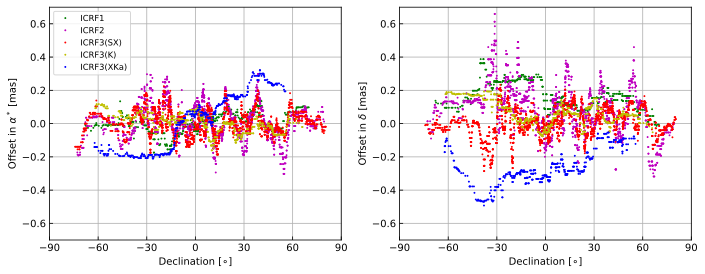

In [27]:
# Plot the smoothed positional formal error
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))

ax0.plot(dec_icrf1, dra_icrf1, "g.", ms=2, label="ICRF1")
ax0.plot(dec_icrf2, dra_icrf2, "m.", ms=2, label="ICRF2")
ax0.plot(dec_sx, dra_sx, "r.", ms=2, label="ICRF3(SX)")
ax0.plot(dec_k, dra_k, "y.", ms=2, label="ICRF3(K)")
ax0.plot(dec_xka, dra_xka, "b.", ms=2, label="ICRF3(XKa)")

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.7, 0.7])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlabel("Declination [$\circ$]")
# ax0.set_yscale("log")
ax0.set_ylabel("Offset in $\\alpha^*$ [mas]")
ax0.grid()  
ax0.legend(fontsize="small")

ax1.plot(dec_icrf1, ddec_icrf1, "g.", ms=2, label="ICRF1")
ax1.plot(dec_icrf2, ddec_icrf2, "m.", ms=2, label="ICRF2")
ax1.plot(dec_sx, ddec_sx, "r.", ms=2, label="ICRF3(SX)")
ax1.plot(dec_k, ddec_k, "y.", ms=2, label="ICRF3(K)")
ax1.plot(dec_xka, ddec_xka, "b.", ms=2, label="ICRF3(XKa)")

ax1.set_ylim([-0.7, 0.7])
ax1.set_xlabel("Declination [$\circ$]")
# ax1.set_yscale("log")
ax1.set_ylabel("Offset in $\delta$ [mas]")
ax1.grid()  
# ax1.legend(fontsize="small")

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig("../plots/icrf_gdr2_offset_vs_decl.png")

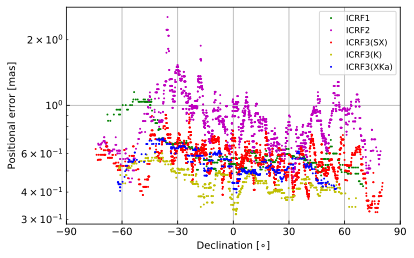

In [28]:
# Plot the smoothed positional formal error
fig, ax = plt.subplots()

ax.plot(dec_icrf1, ang_sep_icrf1, "g.", ms=2, label="ICRF1")
ax.plot(dec_icrf2, ang_sep_icrf2, "m.", ms=2, label="ICRF2")
ax.plot(dec_sx, ang_sep_sx, "r.", ms=2, label="ICRF3(SX)") 
ax.plot(dec_k, ang_sep_k, "y.", ms=2, label="ICRF3(K)")
ax.plot(dec_xka, ang_sep_xka, "b.", ms=2, label="ICRF3(XKa)")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination [$\circ$]")
ax.set_yscale("log")
ax.set_ylabel("Positional error [mas]")
ax.grid()  
ax.legend(fontsize="small")

plt.savefig("../plots/icrf_gdr2_ang_sep.png")